In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt


In [42]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
boston_armed_robberies = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
monthly_air_temperature = pd.read_csv("mean-monthly-air-temperature-deg.csv")
closings_of_the_dowjone = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
total_female_births = pd.read_csv("daily-total-female-births-in-cal.csv")


In [43]:
all_series = {
    "1. Monthly sales of company X": sales_of_company_x["Count"],
    "2. Monthly boston armed robberies": boston_armed_robberies["Count"],
    "3. International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "4. Mean monthly air temperature": monthly_air_temperature["Deg"],
    "5. Weekly closings of the dowjones": closings_of_the_dowjone["Close"],
    "6. Daily total female births": total_female_births["Count"],
}

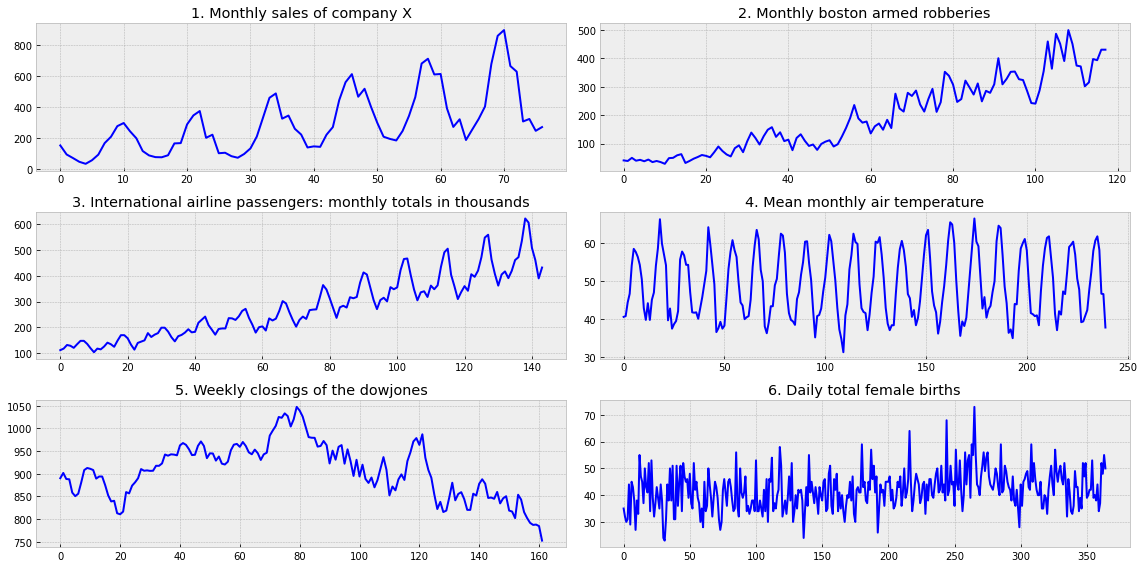

In [44]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

1. Видны тренд и сезонность
2. Тренд
3. Тренд, сезонность
4. Сезонность (и цикл?)
5. , 6. Стационарны 

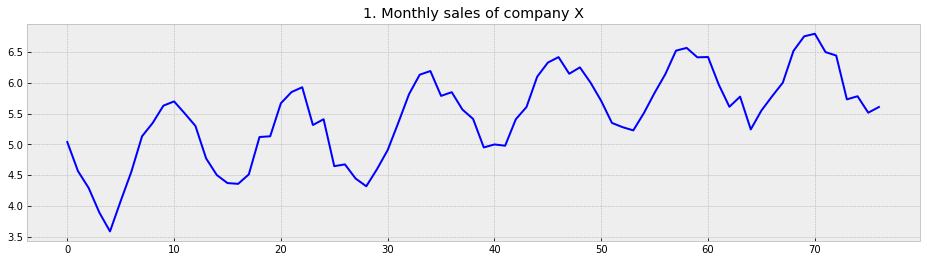

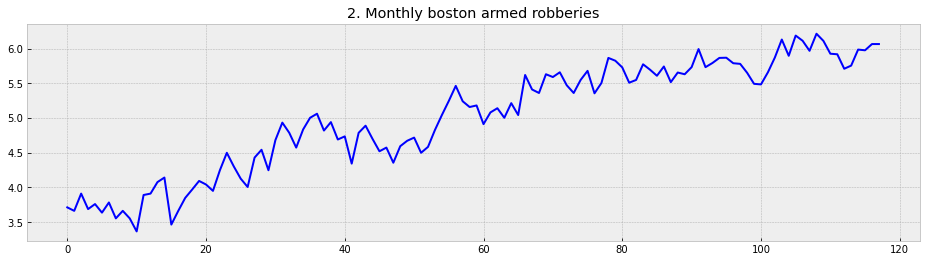

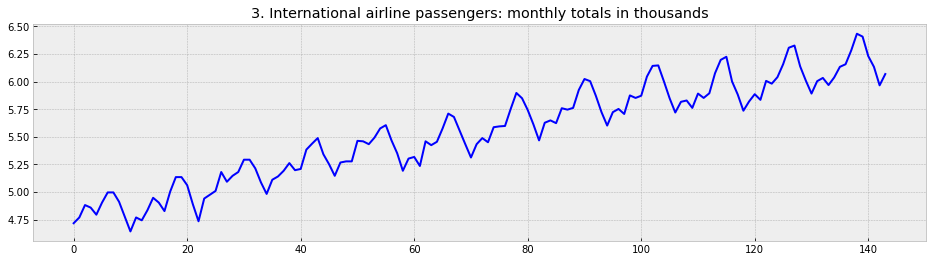

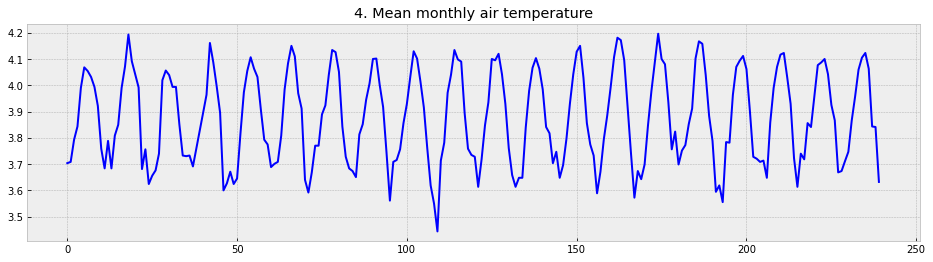

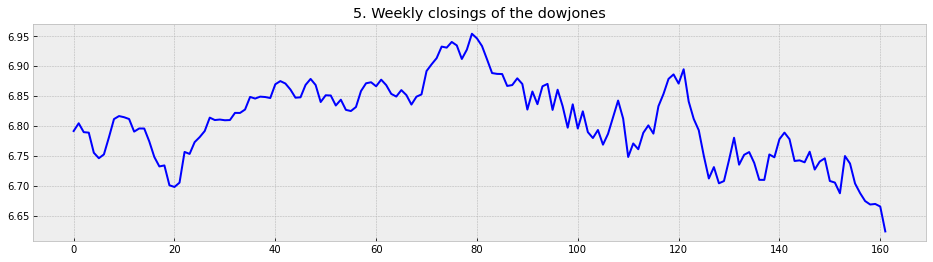

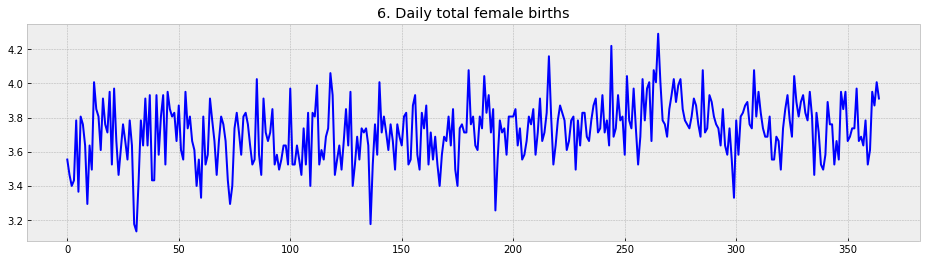

In [45]:
boxcox_dict = {}
for key in all_series.keys():
    boxcox_dict[key] = boxcox(all_series[key], 0)
    with plt.style.context('bmh'):
            plt.figure(figsize=(16, 4))
            plt.plot(boxcox_dict[key], color='blue')
            plt.title(key)

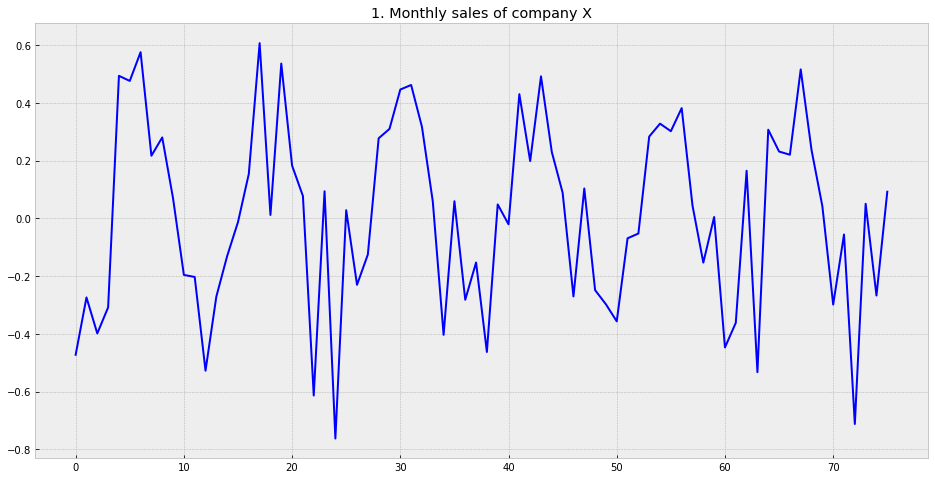

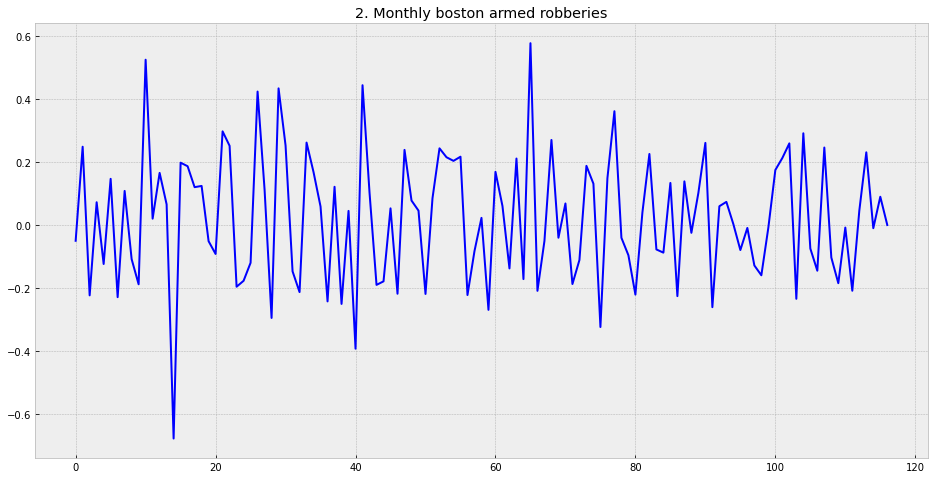

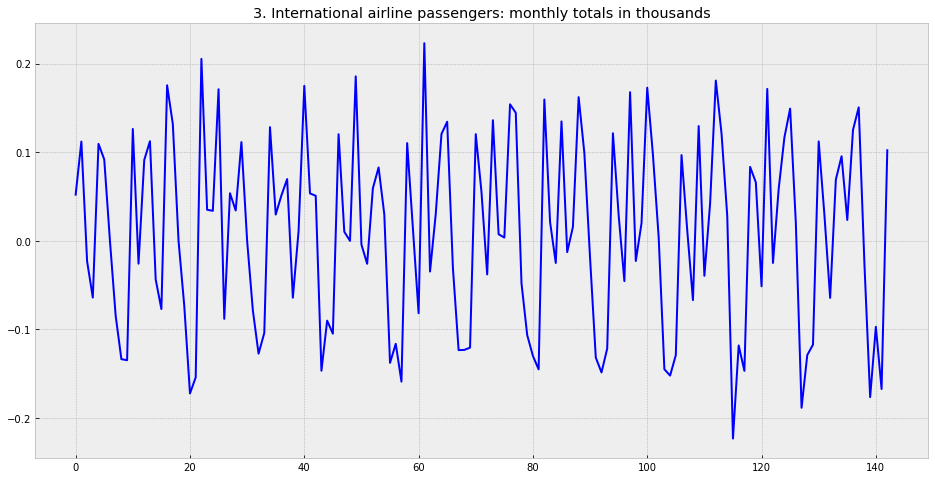

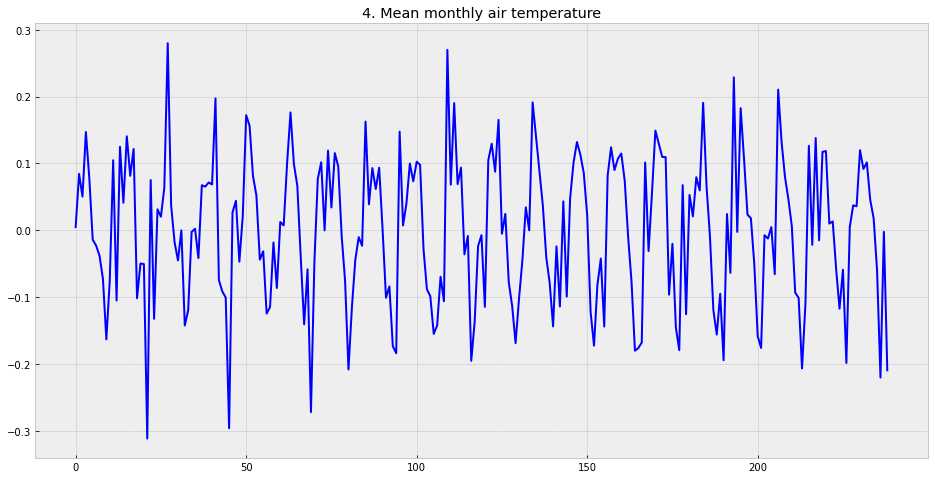

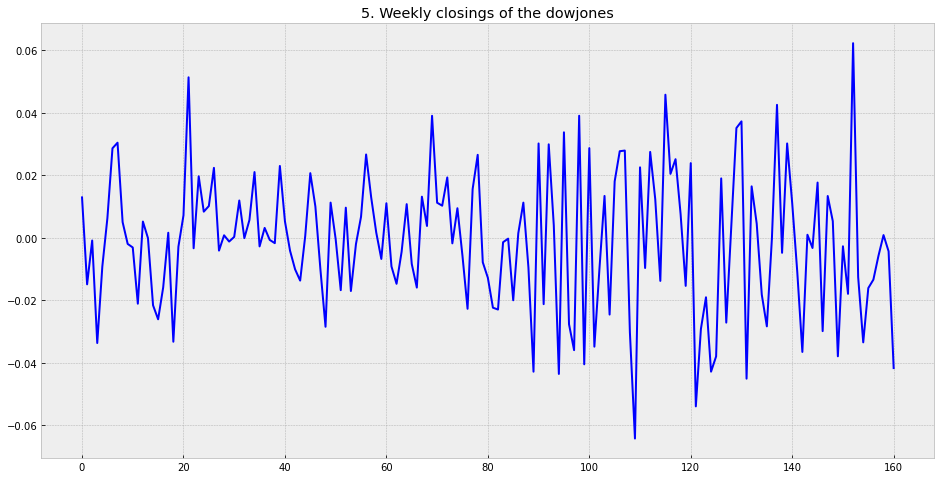

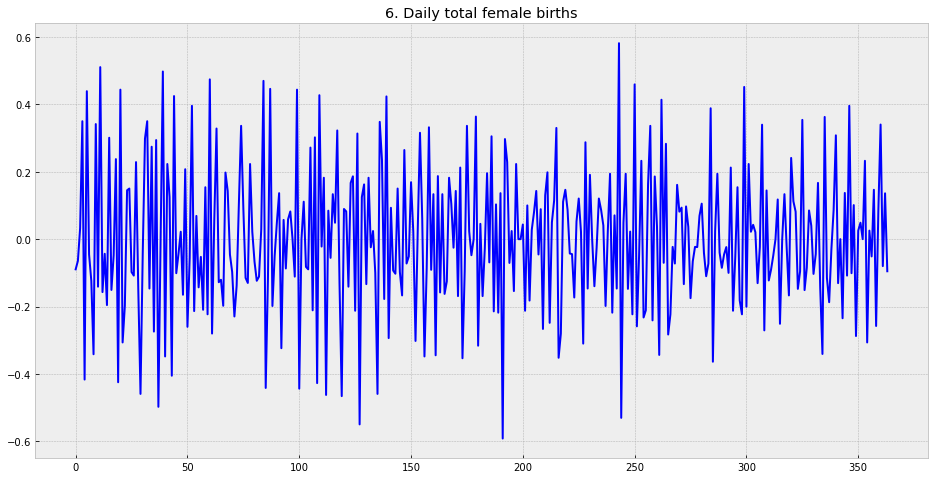

In [46]:
diff_dict = {}
for key in boxcox_dict:
    diff_dict[key] = np.diff(boxcox_dict[key], 1)
    with plt.style.context('bmh'):
            plt.figure(figsize=(16, 8))
            plt.plot(diff_dict[key], color='blue')
            plt.title(key)

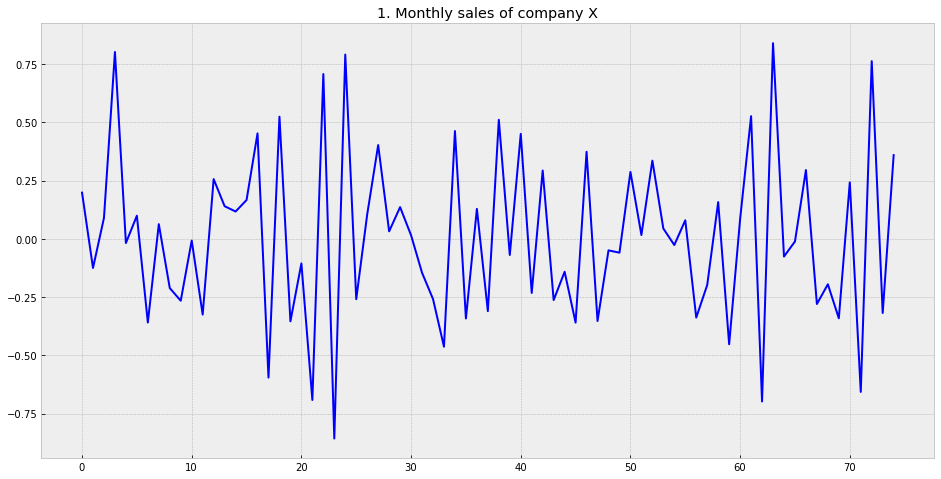

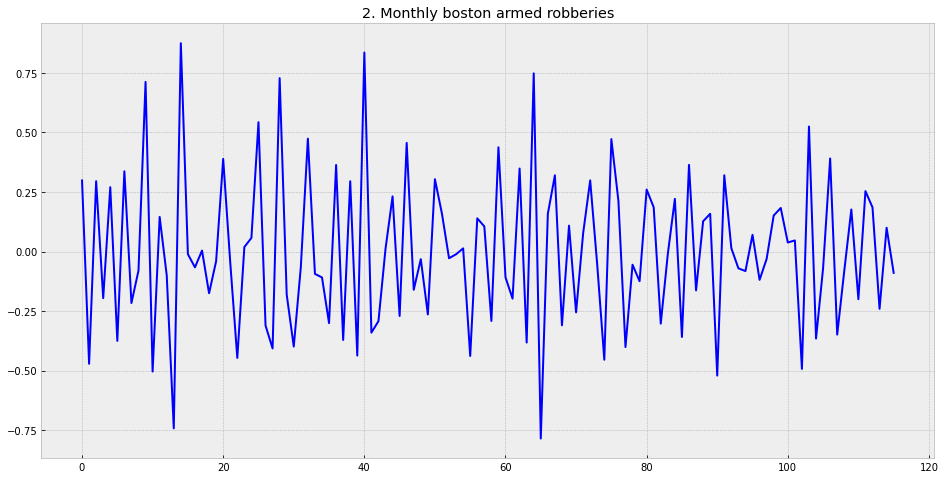

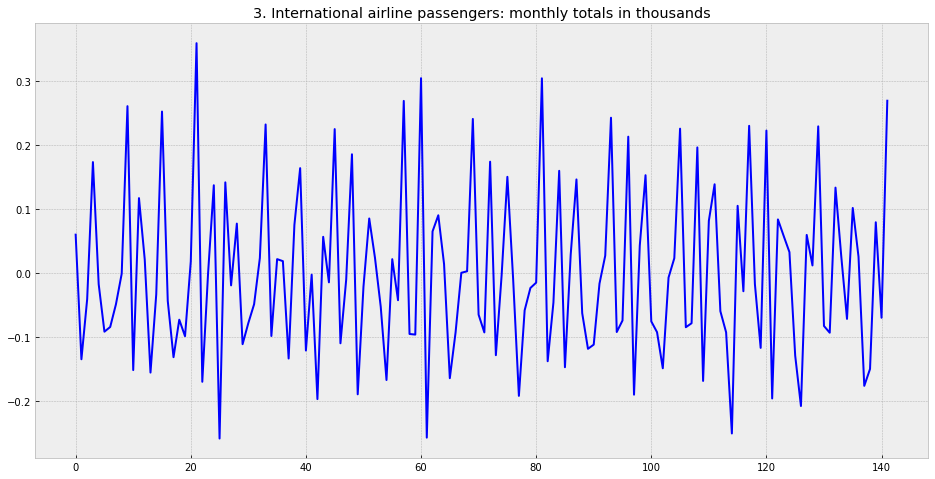

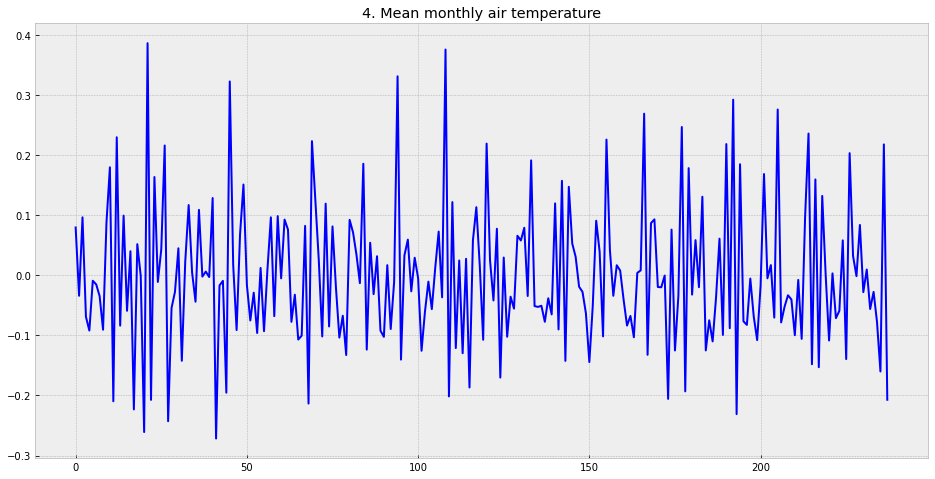

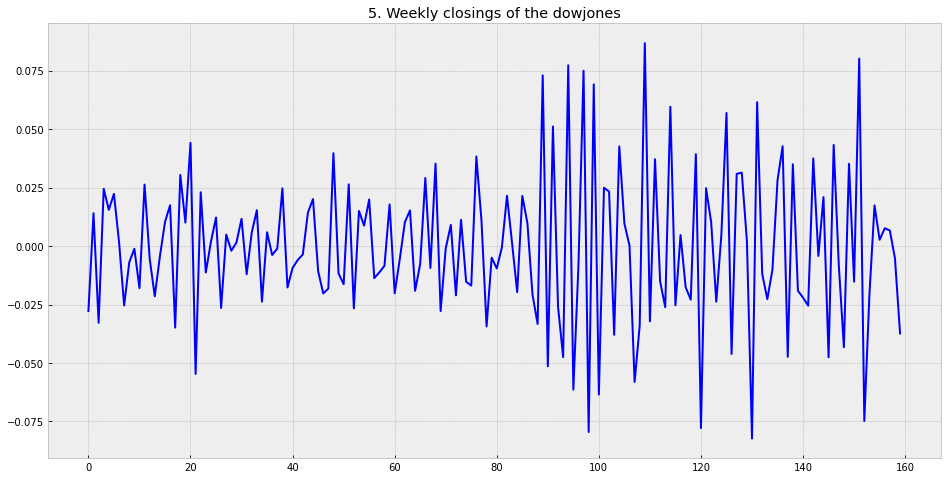

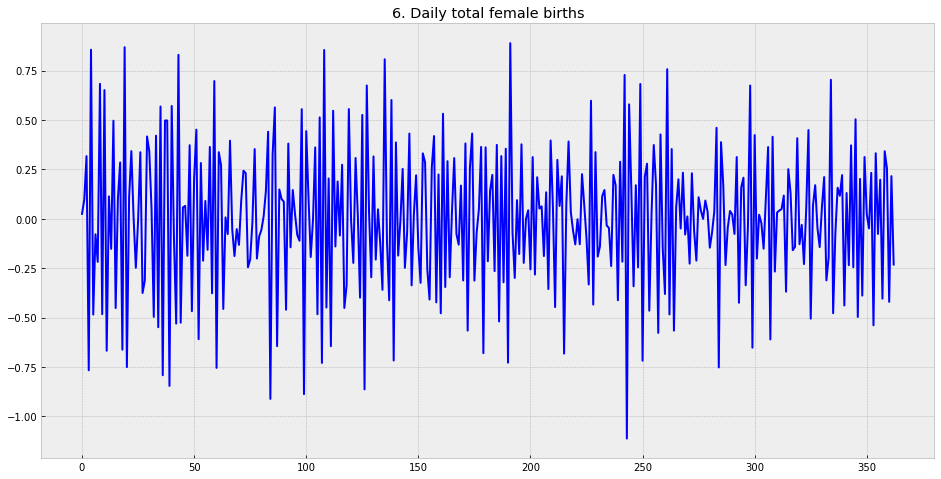

In [53]:
diff_dict_2 = {}
for key in boxcox_dict:
    diff_dict_2[key] = np.diff(diff_dict[key], 1)
    with plt.style.context('bmh'):
            plt.figure(figsize=(16, 8))
            plt.plot(diff_dict_2[key], color='blue')
            plt.title(key)

Тест ДФ:

In [54]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [55]:
for key in diff_dict_2:
    print('\n', key, '\n---------------------',)
    test_stationarity(diff_dict_2[key])


 1. Monthly sales of company X 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                -7.101182e+00
p-value                        4.164137e-10
#Lags Used                     1.100000e+01
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64

 2. Monthly boston armed robberies 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                -6.571432e+00
p-value                        7.918035e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.030000e+02
Critical Value (1%)           -3.495493e+00
Critical Value (5%)           -2.890037e+00
Critical Value (10%)          -2.581971e+00
dtype: float64

 3. International airline passengers: monthly totals in thousands 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value      

In [56]:
for key in all_series:
    print('\n', key, '\n---------------------',)
    test_stationarity(all_series[key])


 1. Monthly sales of company X 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

 2. Monthly boston armed robberies 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64

 3. International airline passengers: monthly totals in thousands 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Us

In [57]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

C:\Users\daria\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\daria\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\daria\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


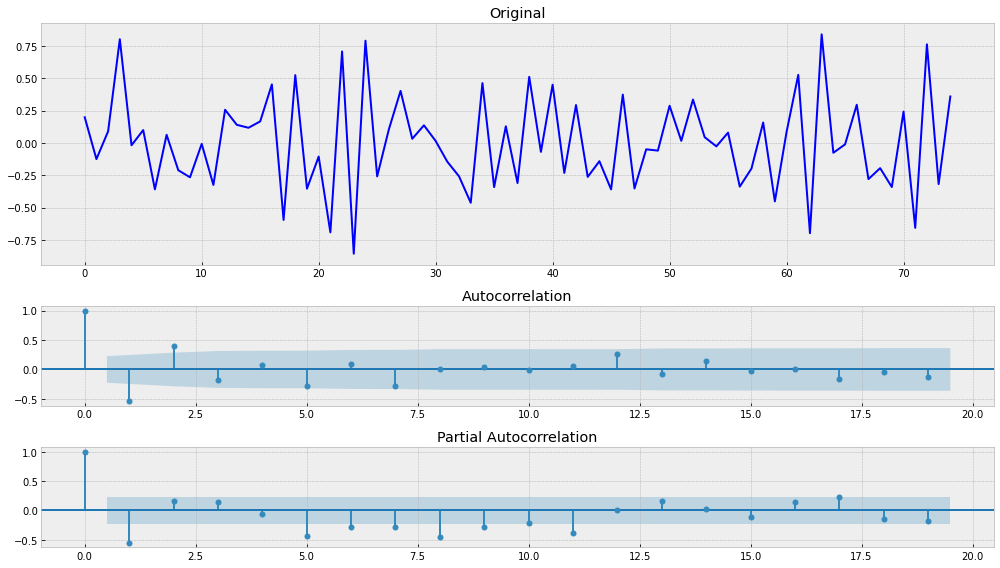

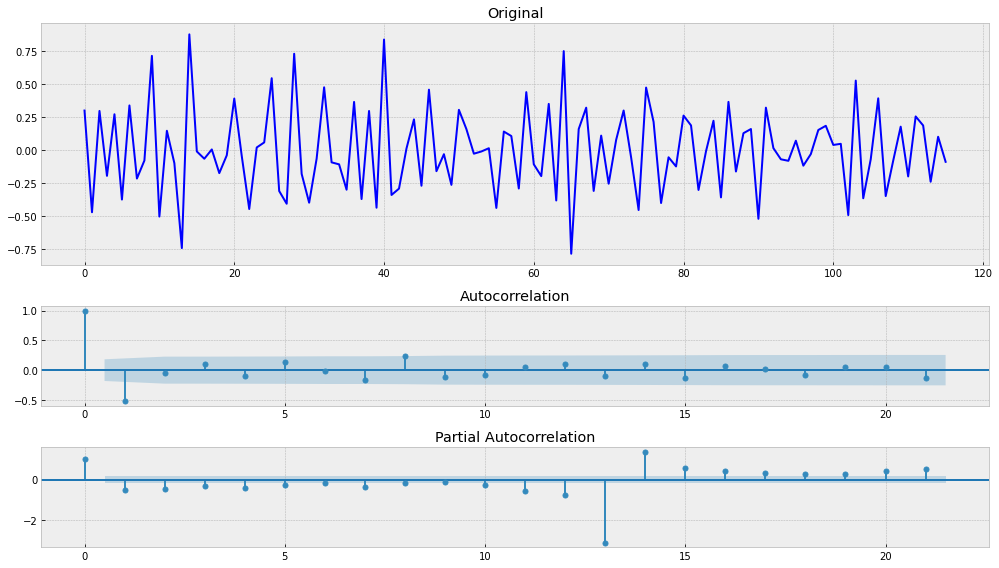

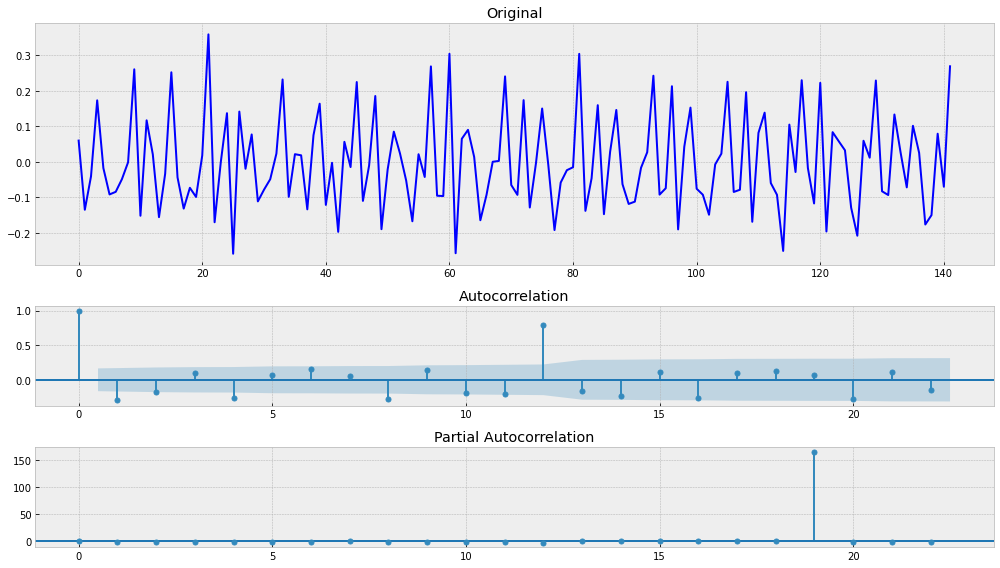

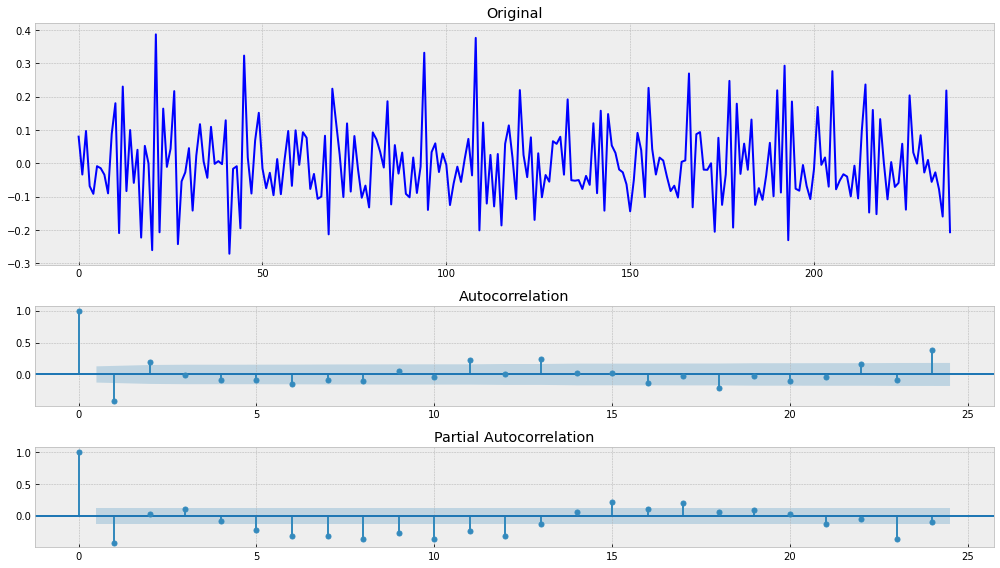

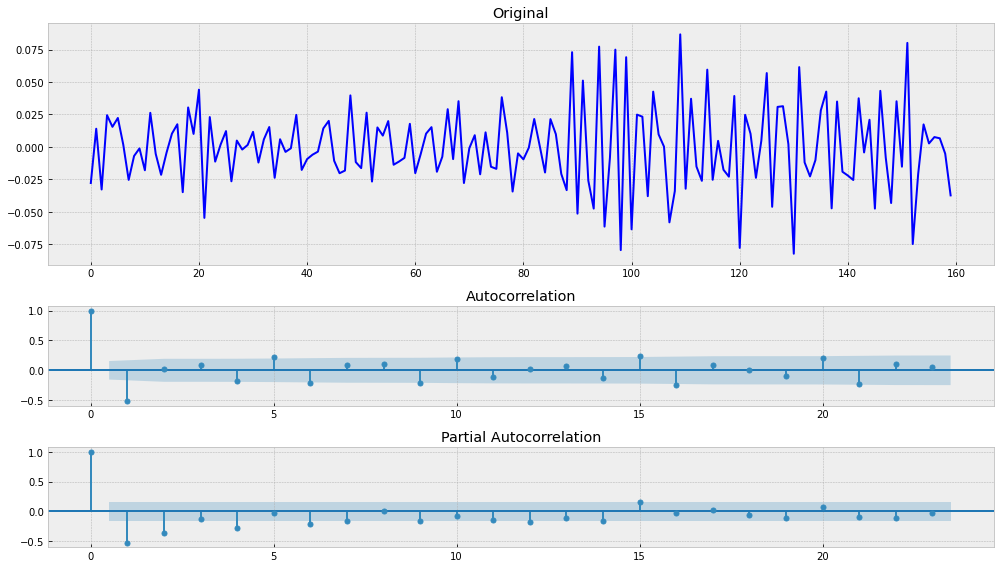

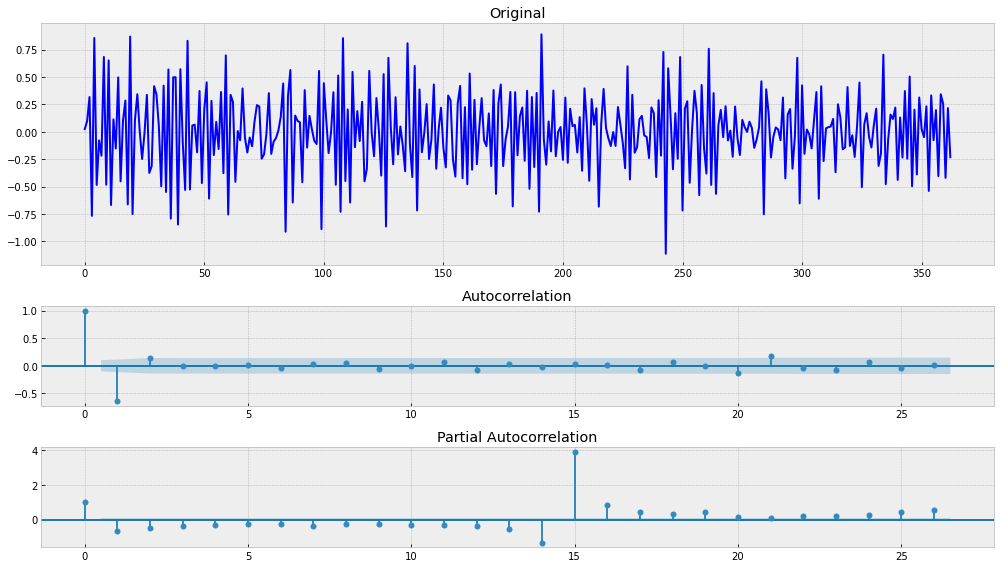

In [59]:
for key in diff_dict_2:
    tsplot(diff_dict_2[key])